In [1]:
!pip install pandas

import pandas as pd

# Replace with your exact file path
file_path = r"C:\Users\cissy\OneDrive - University of Toronto\year 3\bioinformatics independent proj\main project\TNBC_like_samples_expression.csv"

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first 5 rows
df.head()


,sample_id,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
0,2a18db7b-b054-4210-b8cb-a647c26f90c1,6.769980,5.665564,4.840585,3.973459,1.853128,2.435793,8.095304,5.105163,6.548703,...,-5.857171,-4.982409,-1.583542,-5.857171,-5.857171,-5.857171,3.119320,-5.857171,-2.918012,-3.741199
1,507952aa-23c0-4239-ae19-04d8f862acc2,6.673964,-5.857171,5.835037,3.940710,4.304088,0.905035,2.898131,4.837089,5.060279,...,-5.857171,-5.857171,-2.633079,-5.857171,-5.857171,-5.857171,2.223914,-5.857171,-3.938233,-1.959231
2,7002e8cb-0d64-4d4b-a483-bf6dec3c2abb,5.933199,7.943184,4.977569,4.141843,3.571040,0.473420,4.299105,3.898279,5.139204,...,-5.857171,-1.979058,0.896237,-5.857171,1.035856,-5.857171,3.026723,-5.857171,-2.276663,-1.979058
3,7125229a-2fc6-402d-bd87-ad0d3195fd49,6.529936,-4.888747,5.669579,4.577865,4.067720,2.308007,4.800963,4.652661,5.100676,...,-5.857171,-5.857171,-0.138483,-5.857171,-5.857171,-5.857171,2.382958,-5.857171,-1.595840,0.308660
4,b01d7dfd-b577-48b8-8bf2-3c74bb617601,5.933823,4.001811,4.872832,3.750226,1.511764,3.209878,6.892446,5.214680,6.939246,...,-5.857171,-5.857171,-1.267664,-5.857171,-5.857171,-5.857171,3.503179,-5.857171,-2.263059,-2.263059


In [2]:
!pip install umap-learn pandas numpy matplotlib seaborn scikit-learn

In [3]:
import pandas as pd
import numpy as np

# Load your RNA-seq data (replace with your actual file path)
file_path = r"C:\Users\cissy\OneDrive - University of Toronto\year 3\bioinformatics independent proj\main project\TNBC_like_samples_expression.csv"
data = pd.read_csv(file_path,index_col=0)

# Check data structure
print(data.head())
print(f"\nData shape: {data.shape}")

# If needed, set gene names as index (assuming first column contains gene names)
# data = data.set_index(data.columns[0])

                                      ENSG00000000003.15  ENSG00000000005.6  \
sample_id                                                                     
2a18db7b-b054-4210-b8cb-a647c26f90c1            6.769980           5.665564   
507952aa-23c0-4239-ae19-04d8f862acc2            6.673964          -5.857171   
7002e8cb-0d64-4d4b-a483-bf6dec3c2abb            5.933199           7.943184   
7125229a-2fc6-402d-bd87-ad0d3195fd49            6.529936          -4.888747   
b01d7dfd-b577-48b8-8bf2-3c74bb617601            5.933823           4.001811   

                                      ENSG00000000419.13  ENSG00000000457.14  \
sample_id                                                                      
2a18db7b-b054-4210-b8cb-a647c26f90c1            4.840585            3.973459   
507952aa-23c0-4239-ae19-04d8f862acc2            5.835037            3.940710   
7002e8cb-0d64-4d4b-a483-bf6dec3c2abb            4.977569            4.141843   
7125229a-2fc6-402d-bd87-ad0d3195fd49          

In [4]:
# Convert all remaining columns to numeric
expression_data = data.apply(pd.to_numeric, errors='coerce')

# Remove empty rows/columns
expression_data = expression_data.dropna(how='all').dropna(axis=1, how='all')


In [5]:
!pip install numpy==2.1.0 --upgrade

F:\jupyter_venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


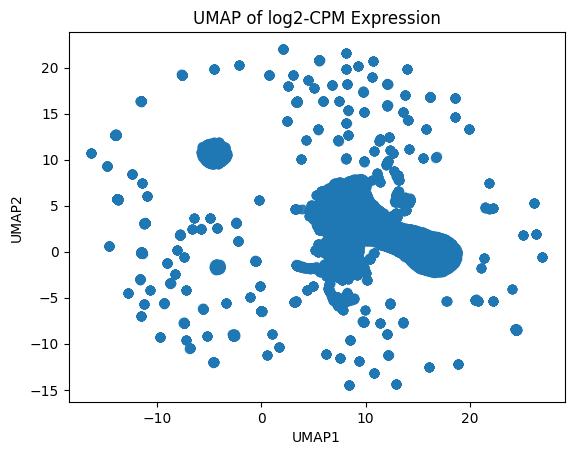

In [6]:
from umap import UMAP

# Ensure data is samples x genes (transpose if needed)
if expression_data.shape[0] < expression_data.shape[1]:
    expression_data = expression_data.T

# UMAP with cosine metric (best for log2-CPM)
umap = UMAP(metric='cosine', random_state=42)
embeddings = umap.fit_transform(expression_data)

# Plotting
import matplotlib.pyplot as plt
plt.scatter(embeddings[:,0], embeddings[:,1], alpha=0.5)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("UMAP of log2-CPM Expression")
plt.show()